In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [78]:
import os
print(os.listdir('../input/'))

['customer-segmentation-tutorial-in-python']


 # Customer Segmentation Project in python

Customer Segmentation is one of the most important applications of unsupervised learning. Using clustering techniques, companies can identify several segments of customers allowing them to target the potential user base. In this machine learning project, we will make use of K-means clustering which is the essential algorithm for clustering unlabeled datasets. 

# What is Customer Segmentation?


Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age,Annual Income ,Spending Score
Malls that deploy customer segmentation are under the notion that every customer has different requirements and require a specific marketing effort to address them appropriately Malls aim to gain a deeper approach of the customer they are targeting. Therefore, their aim has to be specific and should be tailored to address the requirements of each and every individual customer. Furthermore, through the data collected, Malls can gain a deeper understanding of customer preferences as well as the requirements for discovering valuable segments that would reap them maximum profit. This way, they can strategize their marketing techniques more efficiently

# Advantages of customer fragmentation

* Determine the right pricing of the product
* Developing marketing campaigns 
* Optimal product distribution
* Development of new products

# The Problem

Malls complexes are often indulged in the race to increase their customers and hence making huge profits. To achieve this task machine learning is being applied by many stores already.
The malls complexes makes use of their customers’ data and develop ML models in order to target the right ones. This not only increases the sales but also makes the complexes efficient.

# importing the necessary libraries

In [79]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# import the dataset

In [80]:
dataset = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [81]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# check if any value is NaN in a Pandas DataFrame

In [82]:
dataset.isnull().any().any()

False

In [83]:
dataset.shape

(200, 5)

In [84]:
dataset.ndim

2

In [85]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


 # Exploring the Date

the distribution of gender

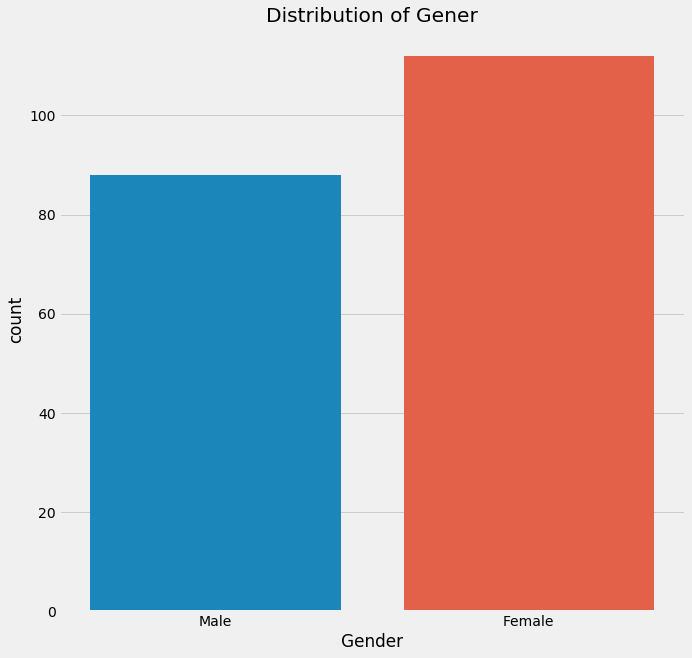

In [86]:
import seaborn as sns
sns.countplot(x='Gender', data=dataset);
plt.title('Distribution of Gener');

A countplot is kind of likea histogram It simply shows the number of occurrences of an  item based on a certain type of category.


 women  more than men in this data set.

# histogram of ages

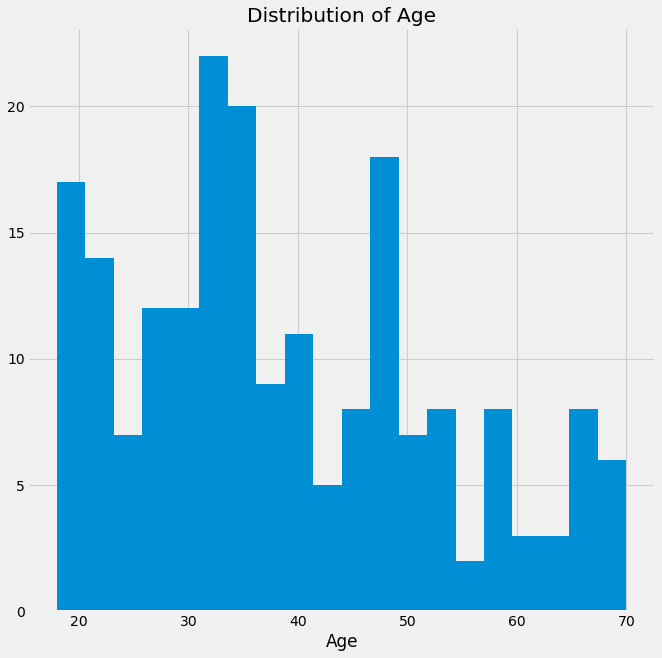

In [87]:
dataset.hist('Age', bins=20);
plt.title('Distribution of Age');
plt.xlabel('Age');

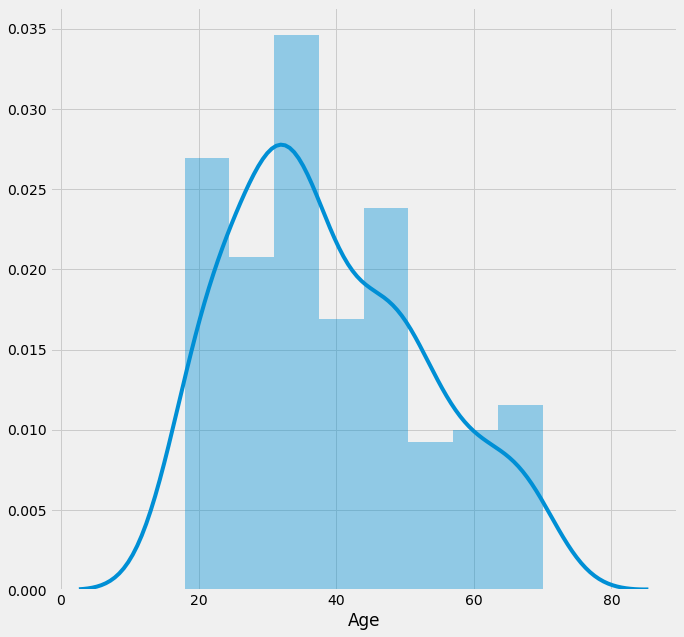

In [88]:
sns.distplot(dataset["Age"])

The ages are mostly between 30 and 48 There are less older customers, so this distribution is right-skewed because of its longer right tail. This could be because of the appeal of malls and the type of demographic that tends to shop there.

# creating one age histogram for each gender

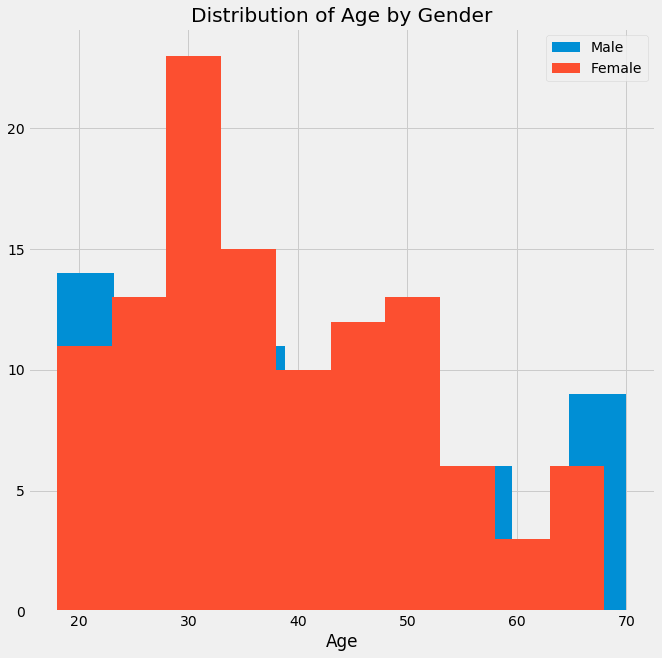

In [89]:
plt.hist('Age', data=dataset[dataset['Gender'] == 'Male'], label='Male');
plt.hist('Age', data=dataset[dataset['Gender'] == 'Female'], label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

The men in this data set tended to be younger than the women. You can see the spike around the age of 30–35

# Income Distribution 

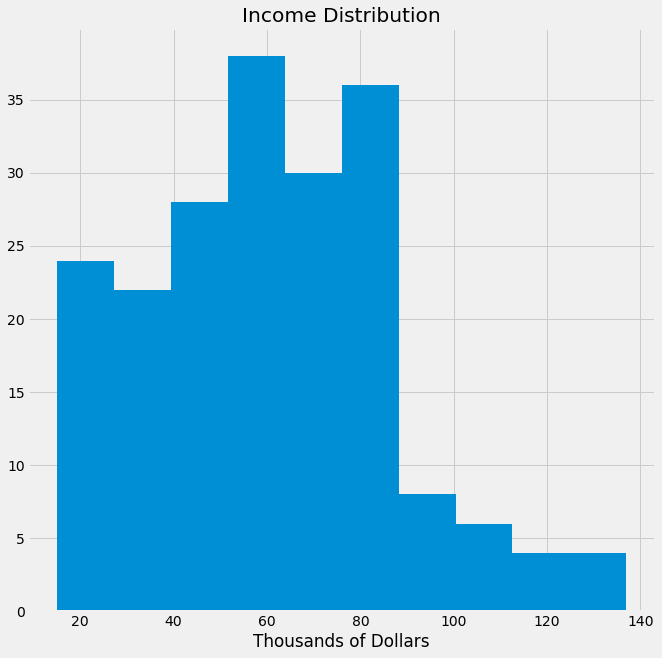

In [90]:
dataset.hist('Annual Income (k$)');
plt.title('Income Distribution');
plt.xlabel('Thousands of Dollars');

Much of the incomes lie between the 50 and 80,000 dollar 

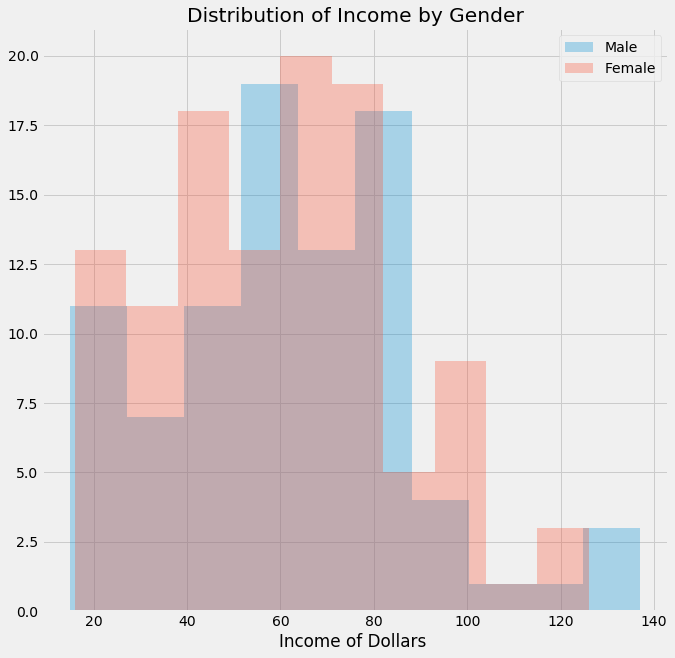

In [91]:
plt.hist('Annual Income (k$)', data=dataset[dataset['Gender']  == 'Male'], alpha=0.3, label='Male');
plt.hist('Annual Income (k$)',  data=dataset[dataset['Gender'] == 'Female'], alpha=0.3, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income of Dollars ');
plt.legend();

The women in this data set make less money than the men

 Create data sets by gender to save time in the future since gender seems to significantly impact other variables


In [92]:
male_data=dataset[dataset['Gender']  == 'Male']
female_data=dataset[dataset['Gender']  == 'Female']

 
print(male_data['Spending Score (1-100)'].mean())
print(female_data['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


Women earned less but spent more at this mall and in this data set.

Text(0.5, 1.0, 'Age to Income, Colored by Gender')

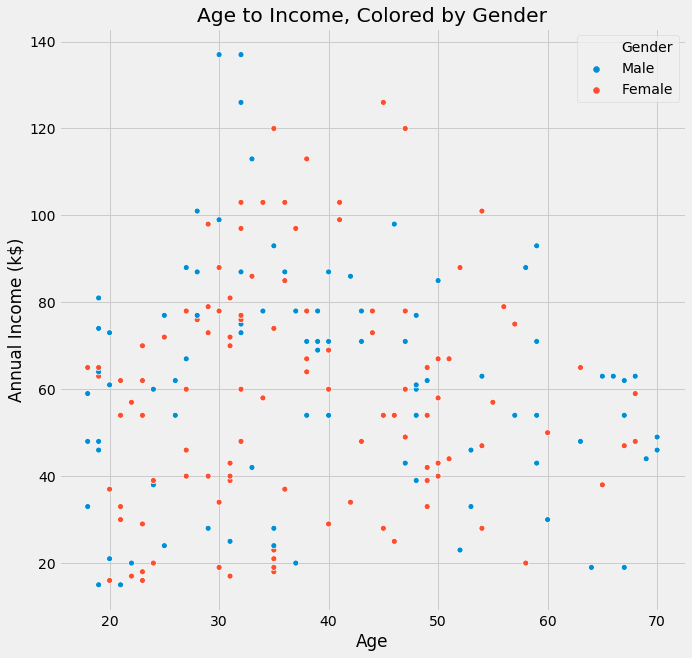

In [93]:
 sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=dataset)
plt.title('Age to Income, Colored by Gender')

There is no clear correlation.

Text(0.5, 1.0, 'Age to Spending Score, Colored by Gender')

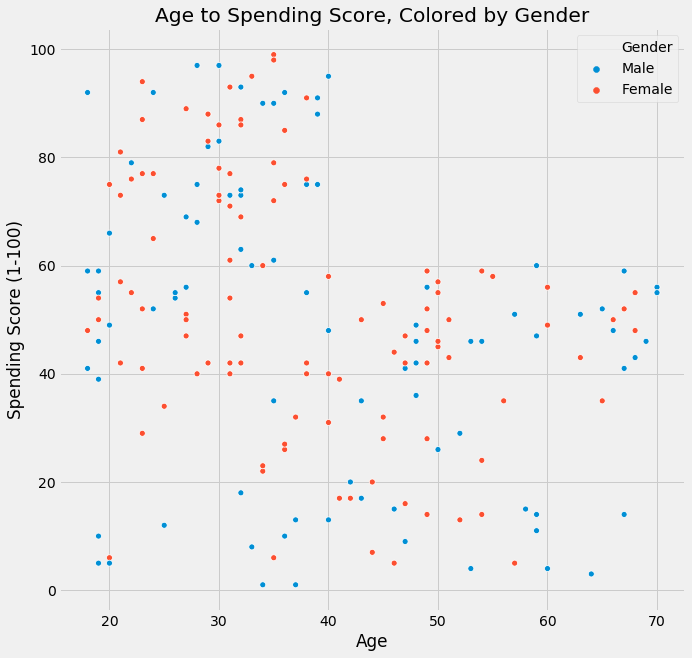

In [94]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data= dataset)
plt.title('Age to Spending Score, Colored by Gender')

You can now see that slight negative correlation

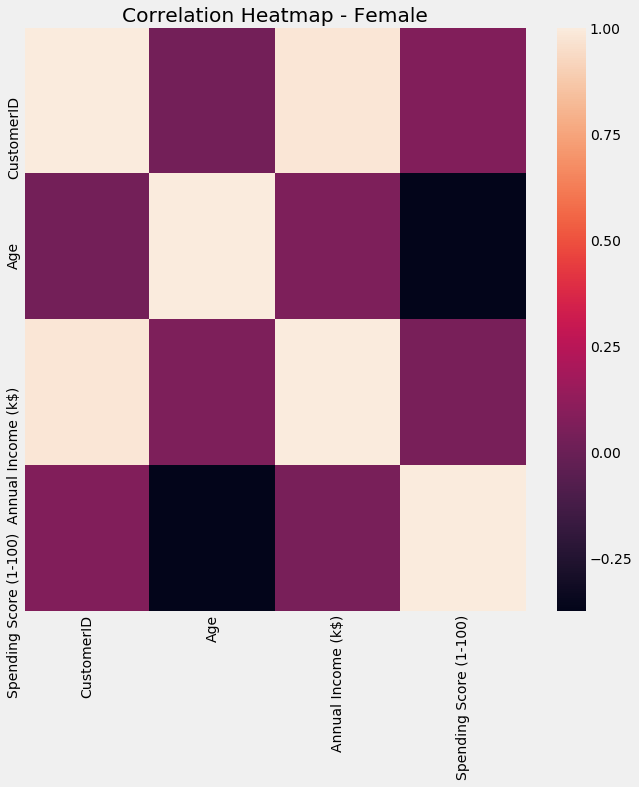

In [95]:
sns.heatmap(female_data.corr());
plt.title('Correlation Heatmap - Female');

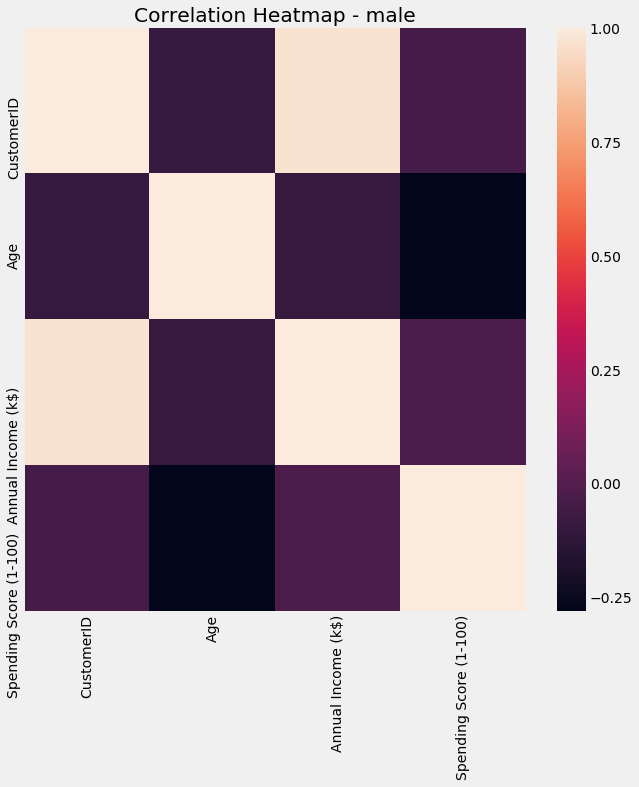

In [96]:
sns.heatmap(male_data.corr());
plt.title('Correlation Heatmap - male');

Age more strongly affects spending score for male in this case. Nothing else is really strongly correlated enough to say much of anything

you can look at income to spending score colored by gender


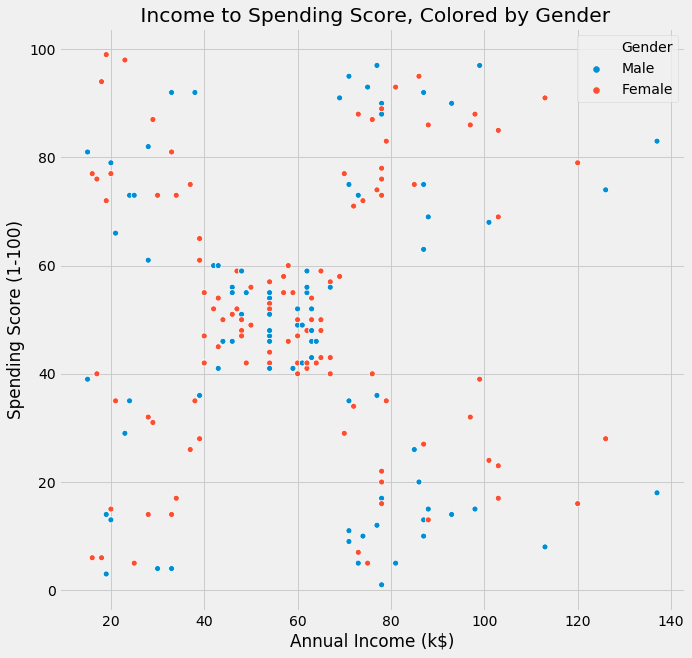

In [97]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=dataset);
plt.title(' Income to Spending Score, Colored by Gender');

* * Low income, low spending score
* Low income, high spending score
* Mid income, medium spending score
* High income, low spending score
* High income, high spending score

I'm going to categorize people by Income to Spending Score by K means

# K-Means Clustering


In [98]:
X = dataset.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters

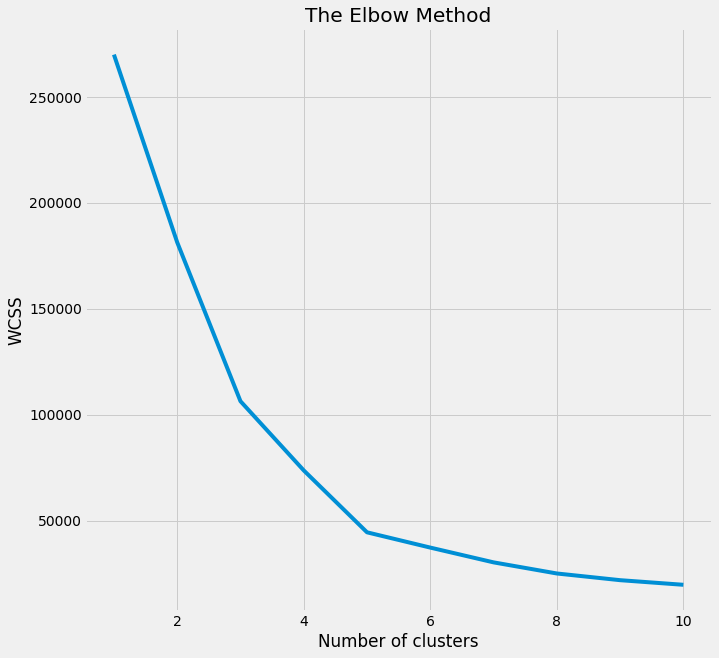

In [99]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using the elbow method we find the optimal number of clusters  K=5

# Fitting K-Means to the dataset

In [100]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

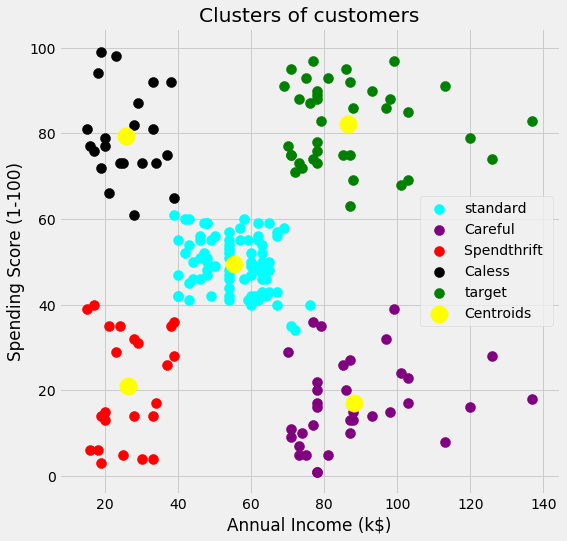

In [101]:
plt.rcParams['figure.figsize'] = ( 8, 8)
plt.title('Cluster of INCOME', fontsize = 30)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'Cyan', label = 'standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'Purple', label = 'Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Spendthrift ')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Caless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers standardT,Caless,arget, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

# Segmentation using Age and Spending Score

In [102]:
x = dataset.iloc[:, [2, 4]].values


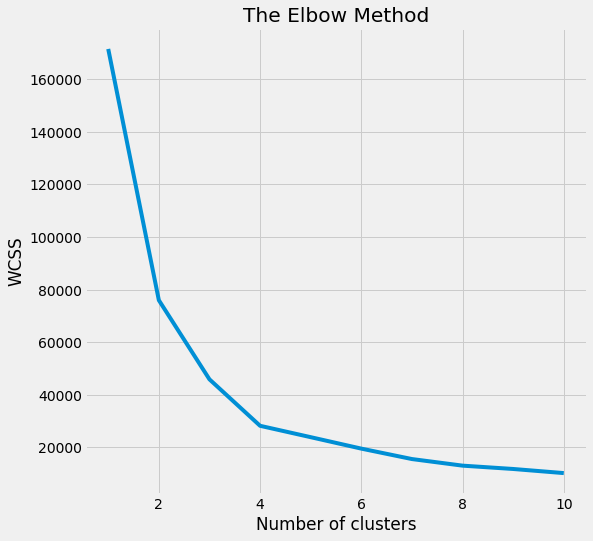

In [103]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset

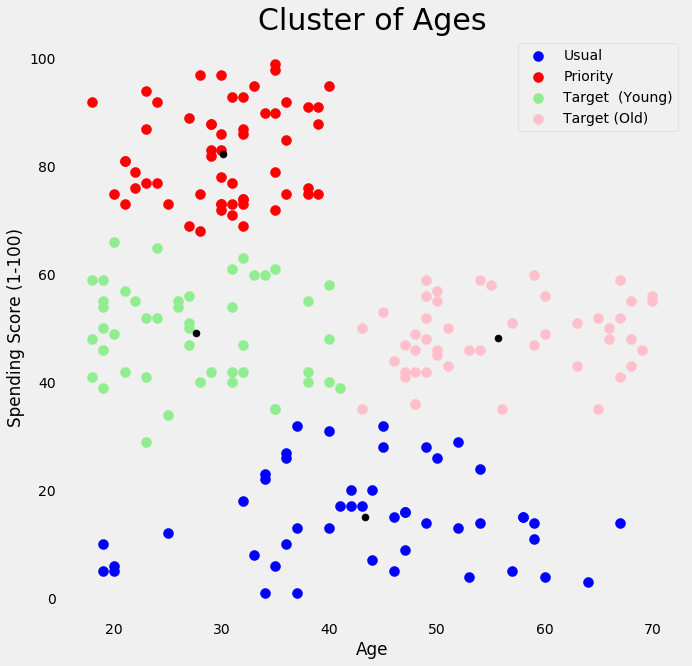

In [104]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'blue', label = 'Usual' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'red', label = 'Priority')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target  (Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'pink', label = 'Target (Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

 I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.